In [1]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/ML-Olympiad/Detect-ChatGpt-answers/"

train = pd.read_csv(PATH+'data/train.csv')
test = pd.read_csv(PATH+'data/test.csv')
submission = pd.read_csv(PATH+'data/sample_submission.csv')

Mounted at /content/drive


## 1. 전처리

In [3]:
train["text"]=train["prompt"]+train["answer"]
train=train[["text","AI"]]

In [4]:
test["text"]=test["prompt"]+test["answer"]
test=test["text"]

In [5]:
train["text"].isna().sum()

1

In [6]:
train = train[train["text"].isna()==False]

In [7]:
train["AI"].isna().sum()

1

In [8]:
train = train[train["AI"].isna()==False]

In [9]:
test.isna().sum()

0

In [10]:
train

,text,AI
0,What is the future of AI?The future of Artific...,1.0
1,What is your biggest challenge in your career?...,0.0
2,What is the tallest mountain in the world?The ...,1.0
3,What are the best 5 super cars?McLaren 720S.\r...,0.0
4,What is deep learning?a type of machine learni...,0.0
...,...,...
743,What is the most important thing in a family?T...,0.0
744,What are the best machine learning Models?Line...,0.0
745,How can I chop onions without crying?The best ...,0.0
746,What is the best way to stay healthy?The best ...,0.0


In [11]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=0767a6f605e0cdc2f11bab88c7282a0fcec7e315626d5b15bb54bc02faec69e5
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [12]:
import numpy as np

In [13]:
import re
def removeHTML(x):
    html=re.compile(r'<.*?>')
    return html.sub(r'',x)
    
import emoji
def dataPreprocessing(x): 
    x = x.lower()
    x = removeHTML(x)
    x = emoji.demojize(x, delimiters=(" ", " "))
    x = re.sub("@\w+", '',x) # removing mentions (@)
    x = re.sub("'\d+", '',x)
    x = re.sub("\d+", '',x)
    x = re.sub(r"[^\w\s]", '',x) # to remove symbols
    x = re.sub("http\w+", '',x)
    x = re.sub("\s[a-z]\s", '',x)
    x = x.strip()
    return x

In [14]:

train_text=train["text"].apply(lambda x: dataPreprocessing(x))

In [15]:
test_text=test.apply(lambda x: dataPreprocessing(x))

In [16]:
train_text

0      what is the future of aithe future of artifici...
1      what is your biggest challenge in your careerm...
2      what is the tallest mountain in the worldthe t...
3      what are the best  super carsmclaren\nferrari ...
4      what is deep learninga type of machine learnin...
                             ...                        
743    what is the most important thing infamilythe m...
744    what are the best machine learning modelslinea...
745    how canchop onions without cryingthe best thin...
746    what is the best way to stay healthythe best w...
747    do you think naruto is overratedi think naruto...
Name: text, Length: 746, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

X = train_text
y = train['AI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
pd.DataFrame(X_train, columns=['text'])

,text
70,what is the name of the unit used to measure p...
164,what is the name of the largest underwater cav...
712,what is the name of the gas that makes up the ...
265,what is the name of the largest underwater cav...
250,what is the most important factor in makingdec...
...,...
71,what is your biggest strengthmy biggest streng...
106,what is the currency of australiaaustralian do...
270,what is the best way to stay positivethe best ...
435,what is the name of the largest underwater cav...


In [19]:
pd.DataFrame(y_train, columns=['AI'])

,AI
70,1.0
164,0.0
712,0.0
265,0.0
250,0.0
...,...
71,0.0
106,0.0
270,0.0
435,0.0


In [20]:
# train_data = pd.concat([pd.DataFrame(X_train, columns=['text']), pd.DataFrame(y_train, columns=['AI'])], axis=1)
# train_data

In [21]:
# test_data = pd.concat([pd.DataFrame(X_test, columns=['text']), pd.DataFrame(y_test, columns=['AI'])], axis=1)
# test_data

In [44]:
import matplotlib.pyplot as plt

텍스트의 최소 길이 : 6
텍스트의 최대 길이 : 303
텍스트의 평균 길이 : 33.89261744966443


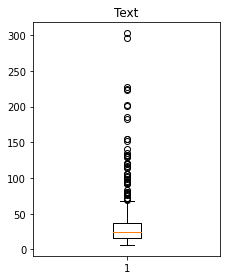

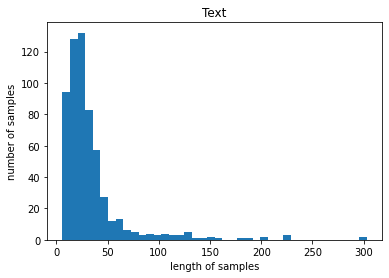

In [45]:
# 길이 분포 출력
text_len = [len(s.split()) for s in X_train]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))


plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 2. 모델링

In [22]:
import os

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_files

import autokeras as ak

In [47]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=True, max_trials=15, objective='val_accuracy', seed=32
)  

In [48]:
# 모델 저장 경로
model_dir = PATH+"model/autokeras_trial15_230305/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# 체크포인트 파일 저장 경로
checkpoint_path = model_dir+"checkpoints_model_autokeras_230305.ckpt"

In [49]:
callbacks = [
tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_weights_only=True, 
    monitor="val_accuracy", mode="max", verbose=1, save_best_only=True
), 
tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.5, patience=8, min_lr=0.0001
),
tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', patience=20, verbose=1), # val_acc로 설정했는데 모델마다 먹히는 경우가 다름 -> 버그로 추정?
]

In [50]:
# Feed the text classifier with training data.
clf.fit(X_train.values, y_train.values, callbacks=callbacks, validation_split=0.2, epochs=50)

Trial 12 Complete [00h 00m 00s]

Best val_accuracy So Far: 0.9523809552192688
Total elapsed time: 00h 45m 17s

Search: Running Trial #13

Value             |Best Value So Far |Hyperparameter
bert              |bert              |text_block_1/block_type
0.5               |0                 |classification_head_1/dropout
adam              |adam              |optimizer
0.0001            |0.0001            |learning_rate
512               |512               |text_block_1/bert_block_1/max_sequence_length



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/keras_tuner/engine/base_tuner.py", line 266, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras_tuner/engine/base_tuner.py", line 231, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/autokeras/engine/tuner.py", line 91, in _build_and_fit_model
    model = self._try_build(trial.hyperparameters)
  File "/usr/local/lib/python3.8/dist-packages/keras_tuner/engine/tuner.py", line 155, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.8/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hyperm

RuntimeError: ignored

# 3. 성능 평가

In [58]:
model = clf.tuner.get_best_models(num_models=1)[0]

In [60]:
print(type(model))

<class 'keras.engine.functional.Functional'>


In [61]:
model.save(model_dir+"model_autokeras_trial15_230305.h5")

In [63]:
ak.CUSTOM_OBJECTS

{'BertPreprocessor': keras_nlp.models.bert.bert_preprocessor.BertPreprocessor,
 'BertBackbone': keras_nlp.models.bert.bert_backbone.BertBackbone,
 'CastToFloat32': autokeras.keras_layers.CastToFloat32,
 'ExpandLastDim': autokeras.keras_layers.ExpandLastDim,
 'MultiCategoryEncoding': autokeras.keras_layers.MultiCategoryEncoding}

In [64]:
loaded_model = tf.keras.models.load_model(model_dir+"model_autokeras_trial15_230305.h5", custom_objects=ak.CUSTOM_OBJECTS)

In [65]:
loaded_model

In [66]:
from sklearn.metrics import classification_report

In [77]:
# Predict with the best model.
predicted_y = model.predict(X_test.values)
# Evaluate the best model with testing data.


5/5 [==============================] - 1s 278ms/step


ValueError: ignored

In [85]:
pred_y = pd.DataFrame(predicted_y, columns=['pred'])['pred'].apply(lambda x: 1 if x > 0.35 else 0)
pred_y

0      0
1      0
2      0
3      0
4      1
      ..
145    0
146    1
147    0
148    0
149    1
Name: pred, Length: 150, dtype: int64

In [86]:
print(classification_report(y_test.values, pred_y.values))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       104
         1.0       0.75      0.85      0.80        46

    accuracy                           0.87       150
   macro avg       0.84      0.86      0.85       150
weighted avg       0.87      0.87      0.87       150



In [76]:
train['AI'].value_counts()

0.0    539
1.0    207
Name: AI, dtype: int64

In [72]:
predicted_y.mean()

0.31247264

In [ ]:
# model_to_use = predictor.get_model_best()
model_pred = clf.predict(test_text.values)

In [ ]:
submission['Category'] = model_pred

In [ ]:
submission = submission.astype({'Category':'int64'})

In [ ]:
submission

In [ ]:
submission.to_csv(PATH+'submit/autokeras_text_val_acc_trial15_submission_230305.csv', index=False)